In [48]:
import pandas as pd

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
response = requests.get('https://www.sofascore.com/tournament/football/germany/2-bundesliga/44#52607',
                        headers={
                            'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'
                        })

In [4]:
response.status_code

200

In [5]:
soup =  BeautifulSoup(response.text, 'html.parser')

In [6]:
soup.select('h[data-tabid="standings"]')

[]

In [7]:
import requests

headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"1e79eb71c8"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Google Chrome";v="117", "Not;A=Brand";v="8", "Chromium";v="117"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36',
}

response = requests.get('https://api.sofascore.com/api/v1/unique-tournament/44/season/42269/standings/total', headers=headers)

In [8]:
response.status_code

200

In [9]:
headers['If-Modified-Since'] = 'Wed, 20 Sep 2023 00:00:00 CEST'

In [10]:
response = requests.get('https://api.sofascore.com/api/v1/unique-tournament/44/season/42269/standings/total', headers=headers)
response.status_code

200

In [11]:
table = response.json()

In [12]:
table_data = table['standings'][0]['rows']

# Create a list to store the data
data = []

# Iterate through the table data and extract the relevant information
for row in table_data:
    team_name = row['team']['name']
    position = row['position']
    matches = row['matches']
    wins = row['wins']
    draws = row['draws']
    losses = row['losses']
    scores_for = row['scoresFor']
    scores_against = row['scoresAgainst']
    points = row['points']

    data.append([position, team_name, matches, wins, draws, losses, scores_for, scores_against, points])

# Define column names for the DataFrame
columns = ['Position', 'Team', 'Matches', 'Wins', 'Draws', 'Losses', 'Goals Scored', 'Goals Conceded', 'Points']

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Use a regular expression to remove numeric prefixes from the 'Team' column
df['Team'] = df['Team'].str.replace(r'^\d+\.\s', '')

# Display the updated DataFrame
print(df)

    Position                    Team  Matches  Wins  Draws  Losses  \
0          1           FC Heidenheim       34    19      2       5   
1          2            Darmstadt 98       34    20      0       7   
2          3            Hamburger SV       34    20      0       8   
3          4      Fortuna Düsseldorf       34    17     12      10   
4          5            FC St. Pauli       34    16      2       8   
5          6         SC Paderborn 07       34    16      4      11   
6          7           Karlsruher SC       34    13      0      14   
7          8           Holstein Kiel       34    12      4      12   
8          9       FC Kaiserslautern       34    11     20      11   
9         10             Hannover 96       34    12     14      14   
10        11            FC Magdeburg       34    12     12      15   
11        12    SpVgg Greuther Fürth       34    10     10      13   
12        13      F.C. Hansa Rostock       34    12      4      17   
13        14        

/var/folders/1w/qymkgmsn4z37tfrrnvqm7cq80000gn/T/ipykernel_89008/343060489.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Team'] = df['Team'].str.replace(r'^\d+\.\s', '')


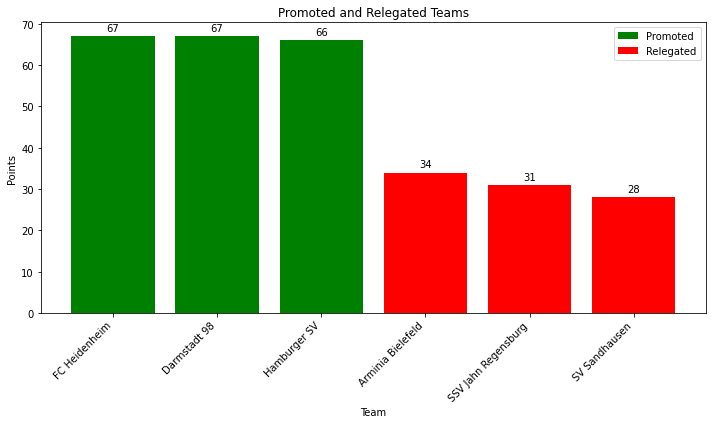

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already created the 'df' DataFrame

# Sort the DataFrame by the 'Position' column in ascending order
df_sorted = df.sort_values(by='Position')

# Select the top three teams as promoted teams
promoted_teams = df_sorted.head(3)

# Select the bottom three teams as relegated teams
relegated_teams = df_sorted.tail(3)

# Create a bar chart to visualize the promoted and relegated teams
plt.figure(figsize=(10, 6))

# Plot promoted teams in green
promoted_bars = plt.bar(promoted_teams['Team'], promoted_teams['Points'], color='green', label='Promoted')

# Plot relegated teams in red
relegated_bars = plt.bar(relegated_teams['Team'], relegated_teams['Points'], color='red', label='Relegated')

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Points')
plt.title('Promoted and Relegated Teams')
plt.xticks(rotation=45, ha='right')

# Show a legend
plt.legend()

# Add points on top of each bar
def add_points_on_top(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords='offset points', ha='center', va='bottom')

add_points_on_top(promoted_bars)
add_points_on_top(relegated_bars)

# Show the plot
plt.tight_layout()
plt.show()


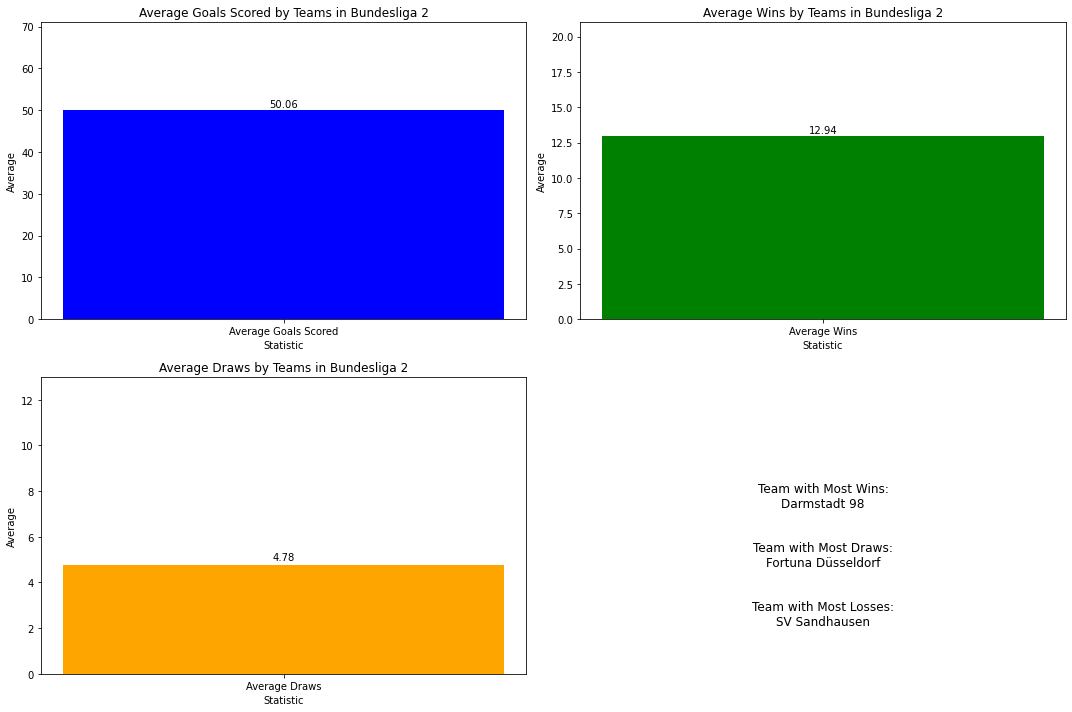

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already created the 'df' DataFrame and the 'promoted_teams' and 'relegated_teams' DataFrames

# Calculate the average goals scored, average wins, and average draws
average_goals_scored = df['Goals Scored'].mean()
average_wins = df['Wins'].mean()
average_draws = df['Draws'].mean()

# Create a new figure for the dashboard
plt.figure(figsize=(15, 10))

# Subplot 1: Average Goals Scored
plt.subplot(2, 2, 1)
plt.bar(['Average Goals Scored'], [average_goals_scored], color='blue')
plt.xlabel('Statistic')
plt.ylabel('Average')
plt.title('Average Goals Scored by Teams in Bundesliga 2')
plt.ylim(0, max(df['Goals Scored']) + 1)  # Set the y-axis limit to ensure readability
# Display the average goals scored above the bar
plt.text('Average Goals Scored', average_goals_scored + 0.1, f'{average_goals_scored:.2f}', ha='center', va='bottom')

# Subplot 2: Average Wins
plt.subplot(2, 2, 2)
plt.bar(['Average Wins'], [average_wins], color='green')
plt.xlabel('Statistic')
plt.ylabel('Average')
plt.title('Average Wins by Teams in Bundesliga 2')
plt.ylim(0, max(df['Wins']) + 1)  # Set the y-axis limit to ensure readability
# Display the average wins above the bar
plt.text('Average Wins', average_wins + 0.1, f'{average_wins:.2f}', ha='center', va='bottom')

# Subplot 3:  Average Draws
plt.subplot(2, 2, 3)
plt.bar(['Average Draws'], [average_draws], color='orange')
plt.xlabel('Statistic')
plt.ylabel('Average')
plt.title('Average Draws by Teams in Bundesliga 2')
plt.ylim(0, max(df['Draws']) + 1)  # Set the y-axis limit to ensure readability
# Display the average draws above the bar
plt.text('Average Draws', average_draws + 0.1, f'{average_draws:.2f}', ha='center', va='bottom')

#Calculate the average goals scored, average wins, and average draws
average_goals_scored = df['Goals Scored'].mean()
average_wins = df['Wins'].mean()
average_draws = df['Draws'].mean()

# Find the team with the most wins, draws, and losses
team_with_most_wins = df[df['Wins'] == df['Wins'].max()]['Team'].values[0]
team_with_most_draws = df[df['Draws'] == df['Draws'].max()]['Team'].values[0]
team_with_most_losses = df[df['Losses'] == df['Losses'].max()]['Team'].values[0]


# Subplot 4: Most wins, draws and losses
plt.subplot(2, 2, 4)
# Calculate the average goals scored, average wins, and average draws
average_goals_scored = df['Goals Scored'].mean()
average_wins = df['Wins'].mean()
average_draws = df['Draws'].mean()

# Find the team with the most wins, draws, and losses
team_with_most_wins = df[df['Wins'] == df['Wins'].max()]['Team'].values[0]
team_with_most_draws = df[df['Draws'] == df['Draws'].max()]['Team'].values[0]
team_with_most_losses = df[df['Losses'] == df['Losses'].max()]['Team'].values[0]

# Add an additional visualization for most wins, most draws, and most losses
plt.text(0.5, 0.6, f'Team with Most Wins:\n{team_with_most_wins}', ha='center', va='center', fontsize=12)
plt.text(0.5, 0.4, f'Team with Most Draws:\n{team_with_most_draws}', ha='center', va='center', fontsize=12)
plt.text(0.5, 0.2, f'Team with Most Losses:\n{team_with_most_losses}', ha='center', va='center', fontsize=12)
plt.axis('off')  # Turn off axes for this visualization


# Adjust spacing between subplots
plt.tight_layout()

# Show the dashboard
plt.show()



In [18]:
df_matches= pd.read_html('https://fbref.com/en/comps/33/2022-2023/schedule/2022-2023-2-Bundesliga-Scores-and-Fixtures',
                         attrs={"id":"sched_2022-2023_33_1"})[0]

In [22]:
df_matches

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2022-07-15,20:30,Kaiserslautern,1.2,2–1,0.8,Hannover 96,40579.0,Fritz-Walter-Stadion,Sven Waschitzki,Match Report,NaN
1,1.0,Sat,2022-07-16,13:00,Jahn R'burg,2.5,2–0,1.5,Darmstadt 98,8509.0,Jahnstadion,Patrick Alt,Match Report,NaN
2,1.0,Sat,2022-07-16,13:00,Sandhausen,1.3,2–1,0.9,Arminia,4709.0,BWT-Stadion Am Hardtwald,Michael Bacher,Match Report,NaN
3,1.0,Sat,2022-07-16,13:00,Greuther Fürth,2.2,2–2,1.0,Holstein Kiel,8756.0,Sportpark Ronhof Thomas Sommer,Robin Braun,Match Report,NaN
4,1.0,Sat,2022-07-16,13:00,St. Pauli,1.8,3–2,0.8,Nürnberg,28582.0,Millerntor-Stadion,Florian Heft,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,34.0,Sun,2023-05-28,15:30,Hansa Rostock,2.1,2–1,1.6,Braunschweig,26500.0,Ostseestadion,Daniel Schlager,Match Report,NaN
335,34.0,Sun,2023-05-28,15:30,Kaiserslautern,1.5,0–3,1.7,Düsseldorf,47956.0,Fritz-Walter-Stadion,Martin Petersen,Match Report,NaN
336,34.0,Sun,2023-05-28,15:30,Greuther Fürth,1.2,4–0,0.2,Darmstadt 98,14333.0,Sportpark Ronhof Thomas Sommer,Nicolas Winter,Match Report,NaN
337,34.0,Sun,2023-05-28,15:30,Jahn R'burg,1.6,2–3,3.6,Heidenheim,14189.0,Jahnstadion,Sören Storks,Match Report,NaN


In [35]:
df_matches.drop(columns=["Notes"])

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report
0,1.0,Fri,2022-07-15,20:30,Kaiserslautern,1.2,2–1,0.8,Hannover 96,40579.0,Fritz-Walter-Stadion,Sven Waschitzki,Match Report
1,1.0,Sat,2022-07-16,13:00,Jahn R'burg,2.5,2–0,1.5,Darmstadt 98,8509.0,Jahnstadion,Patrick Alt,Match Report
2,1.0,Sat,2022-07-16,13:00,Sandhausen,1.3,2–1,0.9,Arminia,4709.0,BWT-Stadion Am Hardtwald,Michael Bacher,Match Report
3,1.0,Sat,2022-07-16,13:00,Greuther Fürth,2.2,2–2,1.0,Holstein Kiel,8756.0,Sportpark Ronhof Thomas Sommer,Robin Braun,Match Report
4,1.0,Sat,2022-07-16,13:00,St. Pauli,1.8,3–2,0.8,Nürnberg,28582.0,Millerntor-Stadion,Florian Heft,Match Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,34.0,Sun,2023-05-28,15:30,Hansa Rostock,2.1,2–1,1.6,Braunschweig,26500.0,Ostseestadion,Daniel Schlager,Match Report
335,34.0,Sun,2023-05-28,15:30,Kaiserslautern,1.5,0–3,1.7,Düsseldorf,47956.0,Fritz-Walter-Stadion,Martin Petersen,Match Report
336,34.0,Sun,2023-05-28,15:30,Greuther Fürth,1.2,4–0,0.2,Darmstadt 98,14333.0,Sportpark Ronhof Thomas Sommer,Nicolas Winter,Match Report
337,34.0,Sun,2023-05-28,15:30,Jahn R'burg,1.6,2–3,3.6,Heidenheim,14189.0,Jahnstadion,Sören Storks,Match Report


,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report
0,1.0,Fri,2022-07-15,20:30,Kaiserslautern,1.2,2–1,0.8,Hannover 96,40579.0,Fritz-Walter-Stadion,Sven Waschitzki,Match Report
1,1.0,Sat,2022-07-16,13:00,Jahn R'burg,2.5,2–0,1.5,Darmstadt 98,8509.0,Jahnstadion,Patrick Alt,Match Report
2,1.0,Sat,2022-07-16,13:00,Sandhausen,1.3,2–1,0.9,Arminia,4709.0,BWT-Stadion Am Hardtwald,Michael Bacher,Match Report
3,1.0,Sat,2022-07-16,13:00,Greuther Fürth,2.2,2–2,1.0,Holstein Kiel,8756.0,Sportpark Ronhof Thomas Sommer,Robin Braun,Match Report
4,1.0,Sat,2022-07-16,13:00,St. Pauli,1.8,3–2,0.8,Nürnberg,28582.0,Millerntor-Stadion,Florian Heft,Match Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,34.0,Sun,2023-05-28,15:30,Hansa Rostock,2.1,2–1,1.6,Braunschweig,26500.0,Ostseestadion,Daniel Schlager,Match Report
335,34.0,Sun,2023-05-28,15:30,Kaiserslautern,1.5,0–3,1.7,Düsseldorf,47956.0,Fritz-Walter-Stadion,Martin Petersen,Match Report
336,34.0,Sun,2023-05-28,15:30,Greuther Fürth,1.2,4–0,0.2,Darmstadt 98,14333.0,Sportpark Ronhof Thomas Sommer,Nicolas Winter,Match Report
337,34.0,Sun,2023-05-28,15:30,Jahn R'burg,1.6,2–3,3.6,Heidenheim,14189.0,Jahnstadion,Sören Storks,Match Report


In [38]:
df_matches.dropna(subset=["Wk"])

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2022-07-15,20:30,Kaiserslautern,1.2,2–1,0.8,Hannover 96,40579.0,Fritz-Walter-Stadion,Sven Waschitzki,Match Report,NaN
1,1.0,Sat,2022-07-16,13:00,Jahn R'burg,2.5,2–0,1.5,Darmstadt 98,8509.0,Jahnstadion,Patrick Alt,Match Report,NaN
2,1.0,Sat,2022-07-16,13:00,Sandhausen,1.3,2–1,0.9,Arminia,4709.0,BWT-Stadion Am Hardtwald,Michael Bacher,Match Report,NaN
3,1.0,Sat,2022-07-16,13:00,Greuther Fürth,2.2,2–2,1.0,Holstein Kiel,8756.0,Sportpark Ronhof Thomas Sommer,Robin Braun,Match Report,NaN
4,1.0,Sat,2022-07-16,13:00,St. Pauli,1.8,3–2,0.8,Nürnberg,28582.0,Millerntor-Stadion,Florian Heft,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,34.0,Sun,2023-05-28,15:30,Hansa Rostock,2.1,2–1,1.6,Braunschweig,26500.0,Ostseestadion,Daniel Schlager,Match Report,NaN
335,34.0,Sun,2023-05-28,15:30,Kaiserslautern,1.5,0–3,1.7,Düsseldorf,47956.0,Fritz-Walter-Stadion,Martin Petersen,Match Report,NaN
336,34.0,Sun,2023-05-28,15:30,Greuther Fürth,1.2,4–0,0.2,Darmstadt 98,14333.0,Sportpark Ronhof Thomas Sommer,Nicolas Winter,Match Report,NaN
337,34.0,Sun,2023-05-28,15:30,Jahn R'burg,1.6,2–3,3.6,Heidenheim,14189.0,Jahnstadion,Sören Storks,Match Report,NaN


In [46]:
df_players= pd.read_html('https://fbref.com/en/comps/33/2022-2023/stats/2022-2023-2-Bundesliga-Stats', attrs={"id":"stats_standard"})

ValueError: No tables found

In [47]:
df_players

[   Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Squad               # Pl                Age   
 0             Arminia                 29               26.6   
 1        Braunschweig                 28               27.2   
 2        Darmstadt 98                 26               27.0   
 3          Düsseldorf                 29               26.3   
 4      Greuther Fürth                 29               25.6   
 5        Hamburger SV                 31               25.7   
 6         Hannover 96                 25               26.2   
 7       Hansa Rostock                 27               27.7   
 8          Heidenheim                 23               26.3   
 9       Holstein Kiel                 29               27.5   
 10        Jahn R'burg                 26               26.1   
 11     Kaiserslautern                 28               28.4   
 12         Karlsruher                 28               27.8   
 13          Magdeburg                 2